In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [81]:
data = pd.read_csv('B3-pima.csv')

In [82]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [83]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

In [85]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,stratify=y,test_size=0.10,random_state=42)

In [86]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
y_pred = classifier.predict(x_test)

In [88]:
print("accuracy score :",accuracy_score(y_test,y_pred))

accuracy score : 0.7662337662337663


In [89]:
feature_importances_df = pd.DataFrame({"feature":list(x.columns),"importance":classifier.feature_importances_}).sort_values("importance",ascending=False)

In [90]:
feature_importances_df

,feature,importance
1,Glucose,0.259349
5,BMI,0.158799
7,Age,0.135129
6,DiabetesPedigreeFunction,0.128705
2,BloodPressure,0.085266
4,Insulin,0.082030
0,Pregnancies,0.081730
3,SkinThickness,0.068993


In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred = clf.predict(x_test)

In [93]:
print("accuracy score- Decision tree :",accuracy_score(y_test,y_pred))

accuracy score- Decision tree : 0.7272727272727273


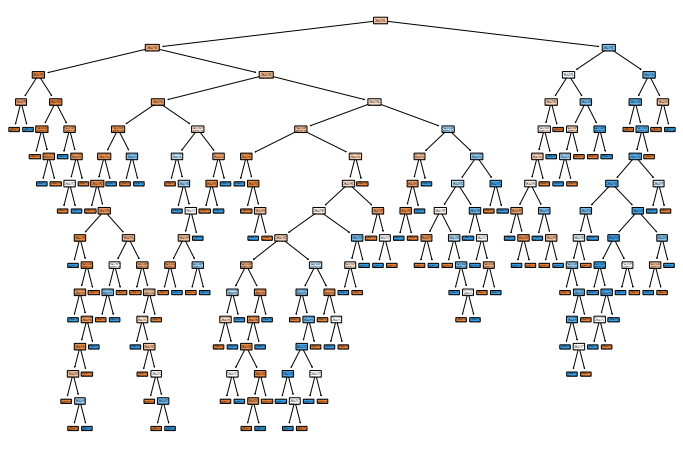

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(clf,rounded=True,filled=True)
plt.show()
